In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# Meng-upload dataset
from google.colab import files

uploaded = files.upload()

# Memuat dataset setelah di-upload
data = pd.read_csv('adult_census.csv')

Saving adult_census.csv to adult_census.csv


In [ ]:
# Menampilkan informasi dasar dataset
data.info()

# Menampilkan beberapa baris pertama dari dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1. Menentukan Distribusi Peluang Diskrit

Distribusi Peluang Diskrit untuk workclass:
 workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64


<ipython-input-28-a3ba757568fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_dist.index, y=freq_dist.values, palette="viridis")


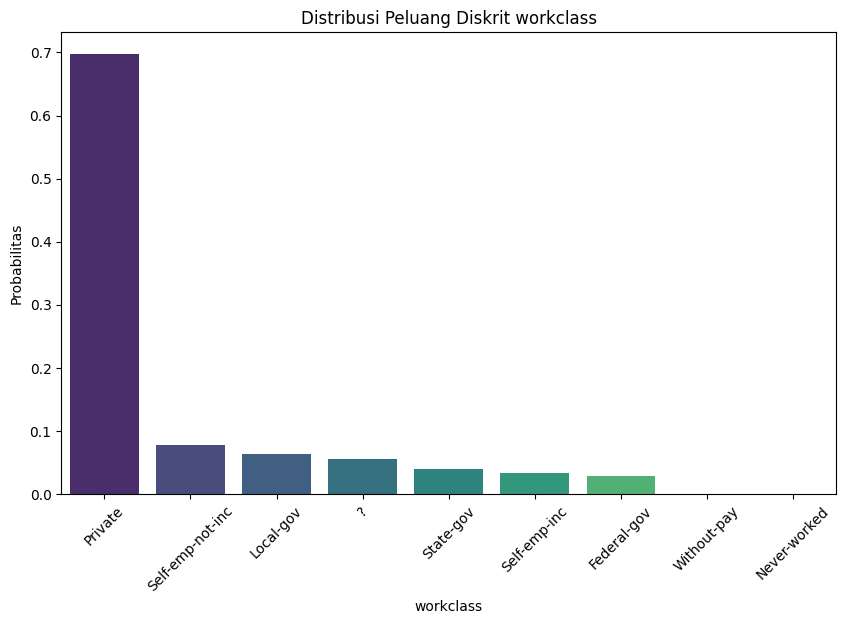

Distribusi Peluang Diskrit untuk education:
 education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64


<ipython-input-28-a3ba757568fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_dist.index, y=freq_dist.values, palette="viridis")


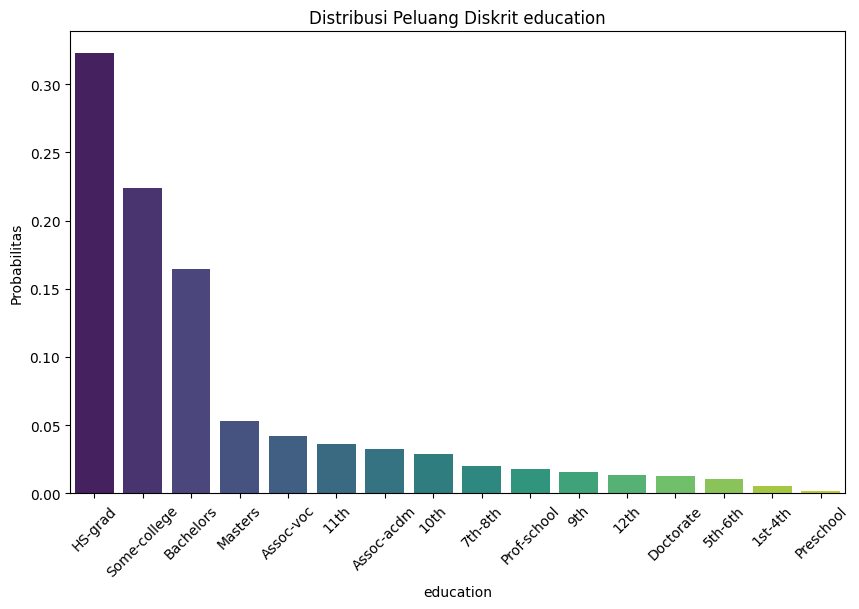

Distribusi Peluang Diskrit untuk marital.status:
 marital.status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64


<ipython-input-28-a3ba757568fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_dist.index, y=freq_dist.values, palette="viridis")


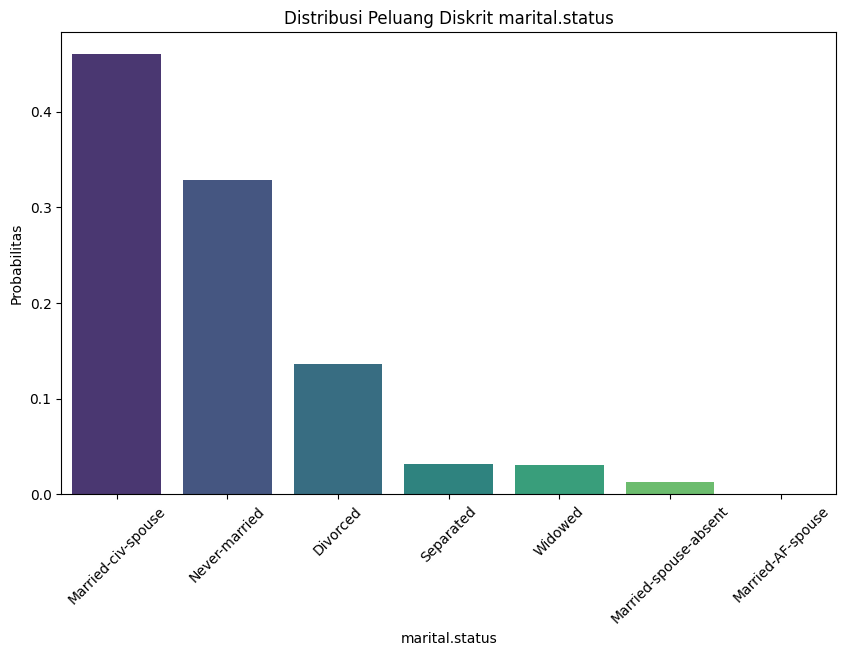

In [ ]:
# @title
# Distribusi frekuensi untuk variabel kategorikal
categorical_vars = ['workclass', 'education', 'marital.status']

for var in categorical_vars:
    freq_dist = data[var].value_counts(normalize=True)
    print(f"Distribusi Peluang Diskrit untuk {var}:\n", freq_dist)

    # Visualisasi distribusi peluang diskrit
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freq_dist.index, y=freq_dist.values, palette="viridis")
    plt.title(f"Distribusi Peluang Diskrit {var}")
    plt.xlabel(var)
    plt.ylabel("Probabilitas")
    plt.xticks(rotation=45)
    plt.show()


1. Distribusi Peluang Diskrit untuk workclass:
  * Distribusi peluang menunjukkan proporsi setiap kategori dalam variabel workclass.
  * Kategori dengan proporsi tertinggi adalah Private dengan nilai sekitar 0,697 (69,7%), yang berarti bahwa sebagian besar individu dalam dataset ini bekerja di sektor swasta.
  * Kategori lain seperti Self-emp-not-inc, Local-gov, dan State-gov juga memiliki proporsi yang signifikan, namun jauh lebih rendah dari Private.
  * Beberapa kategori seperti Without-pay dan Never-worked memiliki frekuensi yang sangat kecil, menunjukkan sedikitnya individu dalam kelompok ini.


2. Distribusi Peluang Diskrit untuk education:
  * Distribusi peluang menunjukkan proporsi setiap tingkat pendidikan dalam variabel education.
  * Kategori dengan frekuensi tertinggi adalah HS-grad (lulusan SMA) dengan proporsi sekitar 0,322 (32,2%).
  * Kategori Some-college (beberapa tahun kuliah) dan Bachelors (sarjana) juga memiliki frekuensi yang cukup besar.
  * Pendidikan yang lebih tinggi seperti Masters, Doctorate, dan Prof-school memiliki frekuensi yang lebih rendah, yang berarti jumlah individu yang mencapai tingkat pendidikan ini relatif kecil dalam dataset ini.

3. Distribusi Peluang Diskrit untuk marital.status:
  * Distribusi peluang menunjukkan proporsi masing-masing status perkawinan dalam variabel marital.status.
  * Kategori dengan proporsi tertinggi adalah Married-civ-spouse (menikah) dengan nilai sekitar 0,460 (46%), menunjukkan bahwa hampir setengah dari individu dalam dataset ini sudah menikah.
  * Status Never-married memiliki proporsi kedua tertinggi dengan nilai sekitar 0,328 (32,8%), diikuti oleh Divorced dengan 0,136 (13,6%).
  * Kategori Married-AF-spouse memiliki proporsi yang sangat kecil, menunjukkan sedikitnya individu dalam status ini.

2. Menentukan Distribusi Peluang Kontinu

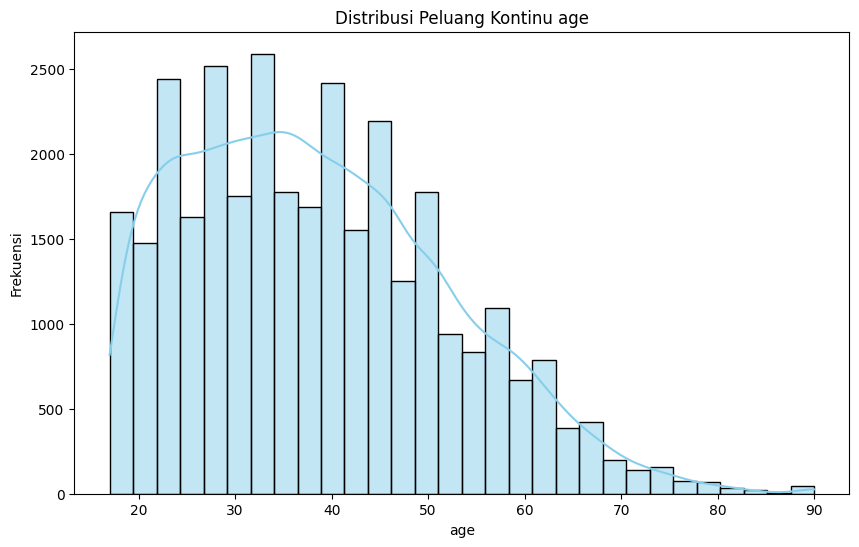

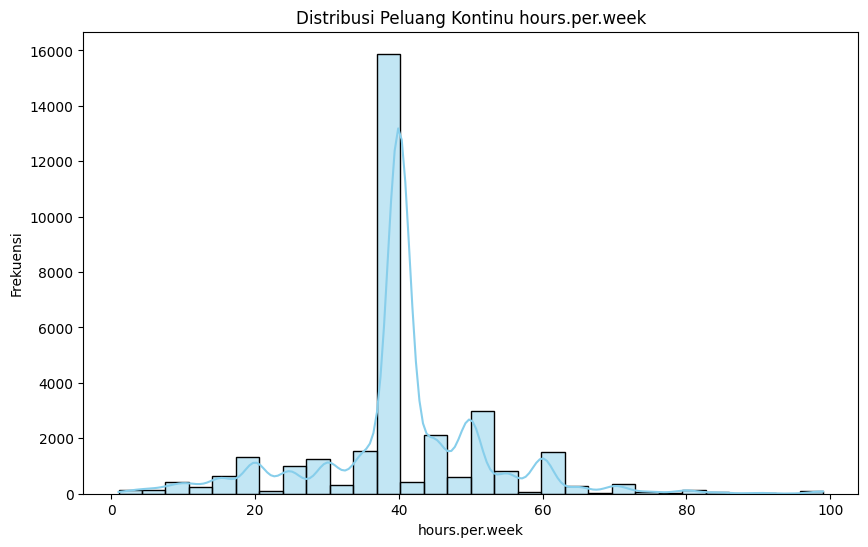

In [ ]:
# Visualisasi distribusi peluang kontinu
continuous_vars = ['age', 'hours.per.week']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True, color="skyblue", bins=30)
    plt.title(f"Distribusi Peluang Kontinu {var}")
    plt.xlabel(var)
    plt.ylabel("Frekuensi")
    plt.show()


1. Distribusi Peluang Kontinu untuk age:
    * Grafik ini menunjukkan distribusi umur dalam dataset.
    * Dari histogram, terlihat bahwa data usia memiliki pola distribusi yang sedikit miring ke kanan (right-skewed), yang menunjukkan bahwa sebagian besar individu dalam data berada pada kelompok usia yang lebih muda, dengan jumlah yang menurun seiring bertambahnya usia.
    * Garis kde (Kernel Density Estimation) menggambarkan bentuk umum distribusi probabilitas dari usia, yang tampak lebih tinggi di kisaran usia 20 hingga 50 tahun, kemudian menurun setelahnya.

2. Distribusi Peluang Kontinu untuk hours.per.week:
    * Grafik ini menunjukkan distribusi jumlah jam kerja per minggu.
    * Dari histogram ini, terlihat bahwa sebagian besar orang bekerja sekitar 40 jam per minggu, yang merupakan standar jam kerja dalam seminggu.
    * Distribusi jam kerja menunjukkan puncak yang sangat tajam di sekitar 40 jam, dengan beberapa individu yang bekerja lebih banyak (di atas 40 jam) atau lebih sedikit dari itu.
    * Bentuk distribusi ini tampak sangat terpusat (peaked) pada angka 40, menunjukkan bahwa 40 jam per minggu adalah waktu kerja paling umum dalam data ini, dan sebagian kecil individu bekerja dengan jumlah jam yang sangat berbeda.

3. Distribusi Gabungan

Distribusi Gabungan antara Education dan Income:
 income           <=50K      >50K
education                       
10th          0.933548  0.066452
11th          0.948936  0.051064
12th          0.923788  0.076212
1st-4th       0.964286  0.035714
5th-6th       0.951952  0.048048
7th-8th       0.938080  0.061920
9th           0.947471  0.052529
Assoc-acdm    0.751640  0.248360
Assoc-voc     0.738784  0.261216
Bachelors     0.585247  0.414753
Doctorate     0.259080  0.740920
HS-grad       0.840491  0.159509
Masters       0.443413  0.556587
Preschool     1.000000  0.000000
Prof-school   0.265625  0.734375
Some-college  0.809765  0.190235


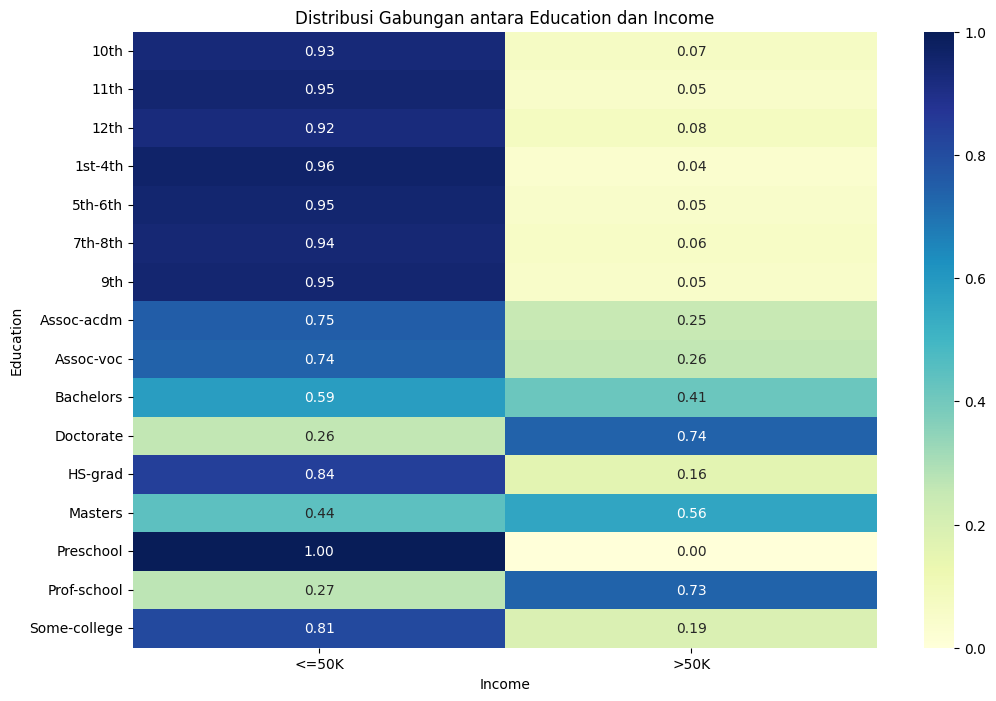

In [ ]:
# Distribusi gabungan menggunakan crosstab
education_income = pd.crosstab(data['education'], data['income'], normalize='index')
print("Distribusi Gabungan antara Education dan Income:\n", education_income)

# Visualisasi distribusi gabungan
plt.figure(figsize=(12, 8))
sns.heatmap(education_income, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Distribusi Gabungan antara Education dan Income")
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()


1. Tabel Distribusi Gabungan antara Education dan Income:
  * Tabel ini berisi proporsi dari masing-masing tingkat pendidikan yang memiliki pendapatan <=50K atau >50K.
  * Setiap baris di tabel menunjukkan persentase dari kelompok pendidikan tertentu yang berada dalam kategori pendapatan <=50K dan >50K.
  * Sebagai contoh:
    * Untuk kelompok dengan pendidikan 10th, sekitar 93,35% memiliki pendapatan <=50K, dan hanya 6,65% memiliki pendapatan >50K.
    * Sementara itu, kelompok dengan gelar Doctorate memiliki proporsi yang lebih besar dalam kategori >50K, yaitu sekitar 74,09%.
  * Secara umum, terlihat bahwa semakin tinggi tingkat pendidikan, semakin tinggi proporsi individu dengan pendapatan >50K.

2. Visualisasi Heatmap:
  * Heatmap menggambarkan data dari tabel dengan warna untuk memudahkan interpretasi. Warna yang lebih gelap (biru) menunjukkan proporsi yang lebih tinggi, dan warna yang lebih terang menunjukkan proporsi yang lebih rendah.
  * Dari heatmap ini, kita dapat melihat pola yang serupa seperti pada tabel:
    * Kelompok dengan pendidikan yang lebih rendah, seperti 10th, 11th, 12th, dan HS-grad, cenderung memiliki proporsi yang tinggi pada kategori pendapatan <=50K.
    * Kelompok dengan pendidikan yang lebih tinggi, seperti Bachelors, Masters, Doctorate, dan Prof-school, memiliki proporsi yang lebih besar di kategori pendapatan >50K.
  * Ini menunjukkan bahwa tingkat pendidikan berpengaruh terhadap kemungkinan pendapatan yang lebih tinggi, dengan individu yang memiliki pendidikan lebih tinggi cenderung berpenghasilan lebih dari 50K.

4. Nilai Harapan

In [ ]:
# Menghitung nilai harapan
expected_capital_gain = np.mean(data['capital.gain'])
expected_hours_per_week = np.mean(data['hours.per.week'])

print("Nilai Harapan Capital Gain:", expected_capital_gain)
print("Nilai Harapan Hours per Week:", expected_hours_per_week)


Nilai Harapan Capital Gain: 1077.6488437087312
Nilai Harapan Hours per Week: 40.437455852092995


1. Nilai Harapan Capital Gain:
  * Nilai harapan dari capital.gain adalah sekitar 1077.65.
  * Ini berarti, rata-rata jumlah keuntungan modal (capital gain) yang diperoleh oleh individu dalam dataset adalah 1077.65.
  * Namun, perlu diingat bahwa banyak individu mungkin memiliki capital.gain sebesar 0, sehingga nilai ini dipengaruhi oleh beberapa individu yang memiliki capital gain yang lebih tinggi.

2. Nilai Harapan Hours per Week:
  * Nilai harapan dari hours.per.week adalah sekitar 40.44 jam per minggu.
  * Ini menunjukkan bahwa, secara rata-rata, individu dalam dataset bekerja sekitar 40.44 jam per minggu.
  * Angka ini mendekati standar kerja penuh waktu di banyak negara, yaitu sekitar 40 jam per minggu.

5. Transformasi

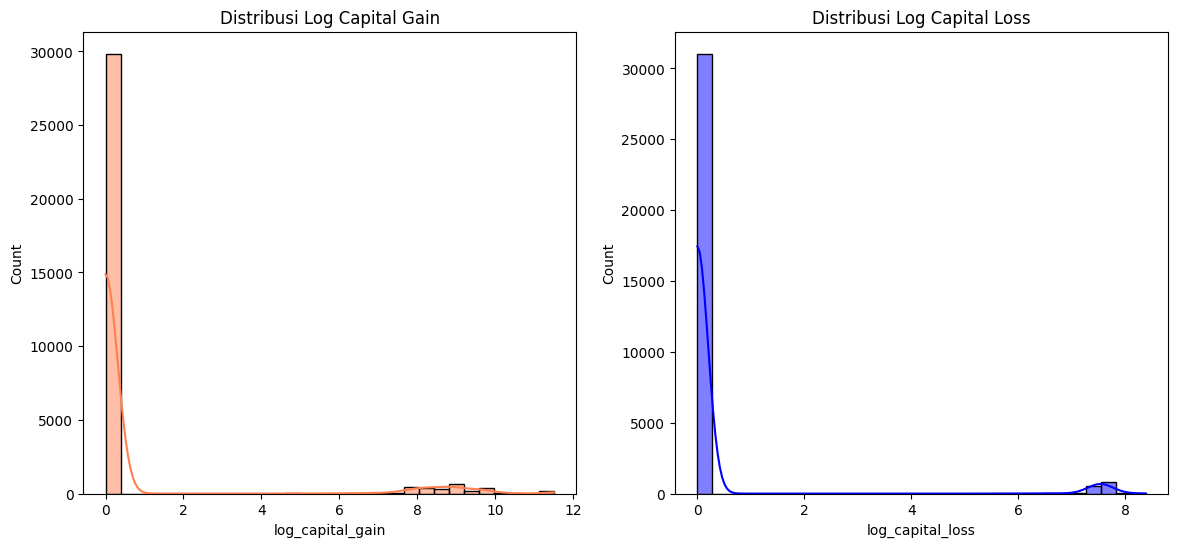

In [ ]:
# Log transformasi (ditambah 1 untuk menghindari log(0))
data['log_capital_gain'] = np.log1p(data['capital.gain'])
data['log_capital_loss'] = np.log1p(data['capital.loss'])

# Visualisasi hasil transformasi
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['log_capital_gain'], kde=True, color="coral", bins=30)
plt.title("Distribusi Log Capital Gain")

plt.subplot(1, 2, 2)
sns.histplot(data['log_capital_loss'], kde=True, color="blue", bins=30)
plt.title("Distribusi Log Capital Loss")

plt.show()


1. Distribusi Log Capital Gain:
  * Setelah transformasi log, distribusi capital.gain menjadi lebih rata, meskipun sebagian besar nilainya masih berkumpul di sekitar nol.
  * Transformasi log ini membuat rentang nilai yang luas menjadi lebih terkompresi, sehingga nilai-nilai capital.gain yang sangat tinggi menjadi lebih dekat ke nilai lainnya dalam distribusi.
  * Ekor distribusi ke arah kanan (positif) menunjukkan adanya beberapa individu dengan nilai capital gain yang signifikan, meskipun jumlahnya sangat sedikit.

2. Distribusi Log Capital Loss:
  * Distribusi capital.loss setelah transformasi log juga menunjukkan pola yang mirip dengan log_capital_gain, di mana sebagian besar nilainya mendekati nol, dengan sedikit individu yang memiliki nilai capital loss yang lebih tinggi.
  * Ekor ke kanan menunjukkan adanya beberapa nilai capital loss yang cukup tinggi, tetapi distribusinya menjadi lebih kompak berkat transformasi log.

6. Penafsiran Parameter

In [ ]:
# Menghitung parameter
mean_hours = data['hours.per.week'].mean()
std_hours = data['hours.per.week'].std()
median_hours = data['hours.per.week'].median()

mean_age = data['age'].mean()
std_age = data['age'].std()
median_age = data['age'].median()

print("Rata-rata Hours per Week:", mean_hours)
print("Standar Deviasi Hours per Week:", std_hours)
print("Median Hours per Week:", median_hours)

print("Rata-rata Age:", mean_age)
print("Standar Deviasi Age:", std_age)
print("Median Age:", median_age)


Rata-rata Hours per Week: 40.437455852092995
Standar Deviasi Hours per Week: 12.347428681730833
Median Hours per Week: 40.0
Rata-rata Age: 38.58164675532078
Standar Deviasi Age: 13.640432553581118
Median Age: 37.0


1. Hours per Week
  * Rata-rata (Mean): Nilai rata-rata hours.per.week adalah 40.44 jam per minggu, yang menunjukkan rata-rata jam kerja per minggu untuk individu dalam dataset ini.
  * Standar Deviasi (Standard Deviation): Standar deviasi sebesar 12.35 menunjukkan seberapa jauh nilai hours.per.week menyebar dari rata-ratanya. Standar deviasi yang cukup besar ini menunjukkan adanya variasi dalam jam kerja individu, dengan beberapa bekerja lebih banyak atau lebih sedikit dari rata-rata.
  * Median: Median hours.per.week adalah 40.0, yang berarti setengah dari individu bekerja 40 jam per minggu atau kurang, dan setengahnya lagi bekerja lebih dari 40 jam per minggu. Karena median dan mean hampir sama, distribusi jam kerja cenderung simetris dengan sedikit variasi.

2. Age
  * Rata-rata (Mean): Nilai rata-rata age adalah 38.58 tahun, menunjukkan usia rata-rata individu dalam dataset.
  * Standar Deviasi (Standard Deviation): Standar deviasi sebesar 13.64 menunjukkan tingkat penyebaran usia dari rata-ratanya. Penyebaran ini menunjukkan variasi usia individu dalam dataset, yang cukup besar.
  * Median: Median age adalah 37.0 tahun, yang berarti setengah dari individu berusia 37 tahun atau lebih muda, dan setengahnya lagi berusia lebih tua. Median yang sedikit lebih rendah dari rata-rata menunjukkan sedikit skew pada usia, dengan beberapa individu berusia lebih tua.

7. Uji Hipotesis

T-statistik: -42.583873499437956
P-value: 0.0


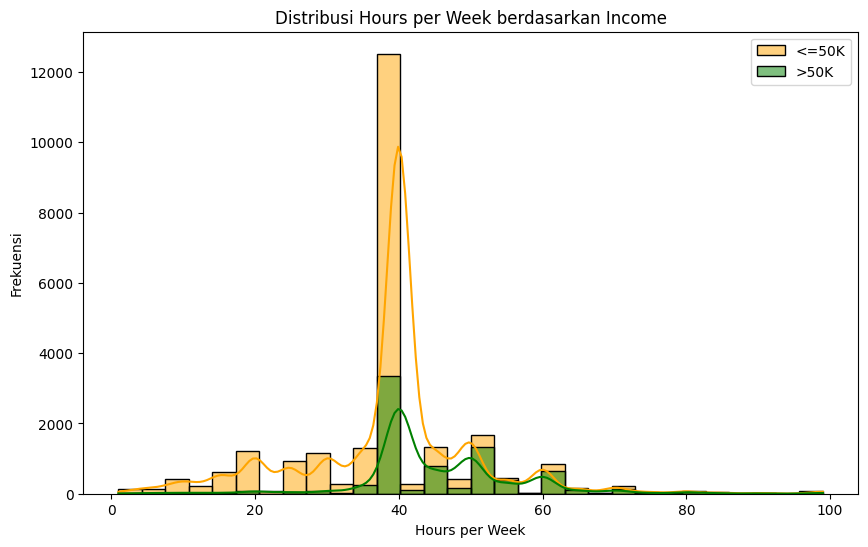

In [ ]:
# Pisahkan data berdasarkan income
group1 = data[data['income'] == '<=50K']['hours.per.week']
group2 = data[data['income'] == '>50K']['hours.per.week']

# Uji t dua sampel
t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-statistik:", t_stat)
print("P-value:", p_value)

# Visualisasi distribusi hours.per.week untuk kedua kelompok
plt.figure(figsize=(10, 6))
sns.histplot(group1, color="orange", label="<=50K", kde=True, bins=30)
sns.histplot(group2, color="green", label=">50K", kde=True, bins=30)
plt.title("Distribusi Hours per Week berdasarkan Income")
plt.xlabel("Hours per Week")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


1. Grafik menunjukkan distribusi jumlah jam kerja per minggu (hours.per.week) untuk dua kelompok pendapatan:
  * (<=50K): Kelompok dengan pendapatan kurang dari atau sama dengan $50K per tahun.

  * (>50K): Kelompok dengan pendapatan lebih dari $50K per tahun.

2. Observasi dari grafik:
  * Kebanyakan individu dalam kedua kelompok bekerja sekitar 40 jam per minggu.
  * Namun, kelompok dengan pendapatan lebih dari $50K memiliki sebaran yang lebih besar di sisi kanan grafik, menunjukkan bahwa ada lebih banyak orang dengan pendapatan lebih tinggi yang bekerja lebih dari 40 jam per minggu dibandingkan dengan kelompok pendapatan <=50K.
  * Ini menunjukkan adanya kecenderungan bahwa individu dengan pendapatan lebih tinggi cenderung memiliki jam kerja yang sedikit lebih tinggi.

3. Hasil uji t dua sampel memberikan:
  * T-statistik: -42.58
  * P-value: 0.0

4. Interpretasi hasil uji:
  * T-statistik yang besar secara negatif menunjukkan adanya perbedaan signifikan antara rata-rata jam kerja per minggu antara dua kelompok pendapatan.
  * P-value sebesar 0.0 (atau sangat mendekati nol) mengindikasikan bahwa perbedaan ini sangat signifikan secara statistik. Dengan kata lain, kemungkinan besar perbedaan ini bukan karena kebetulan.